# Predicting Ames Housing Prices

### Project by Joey Navarro

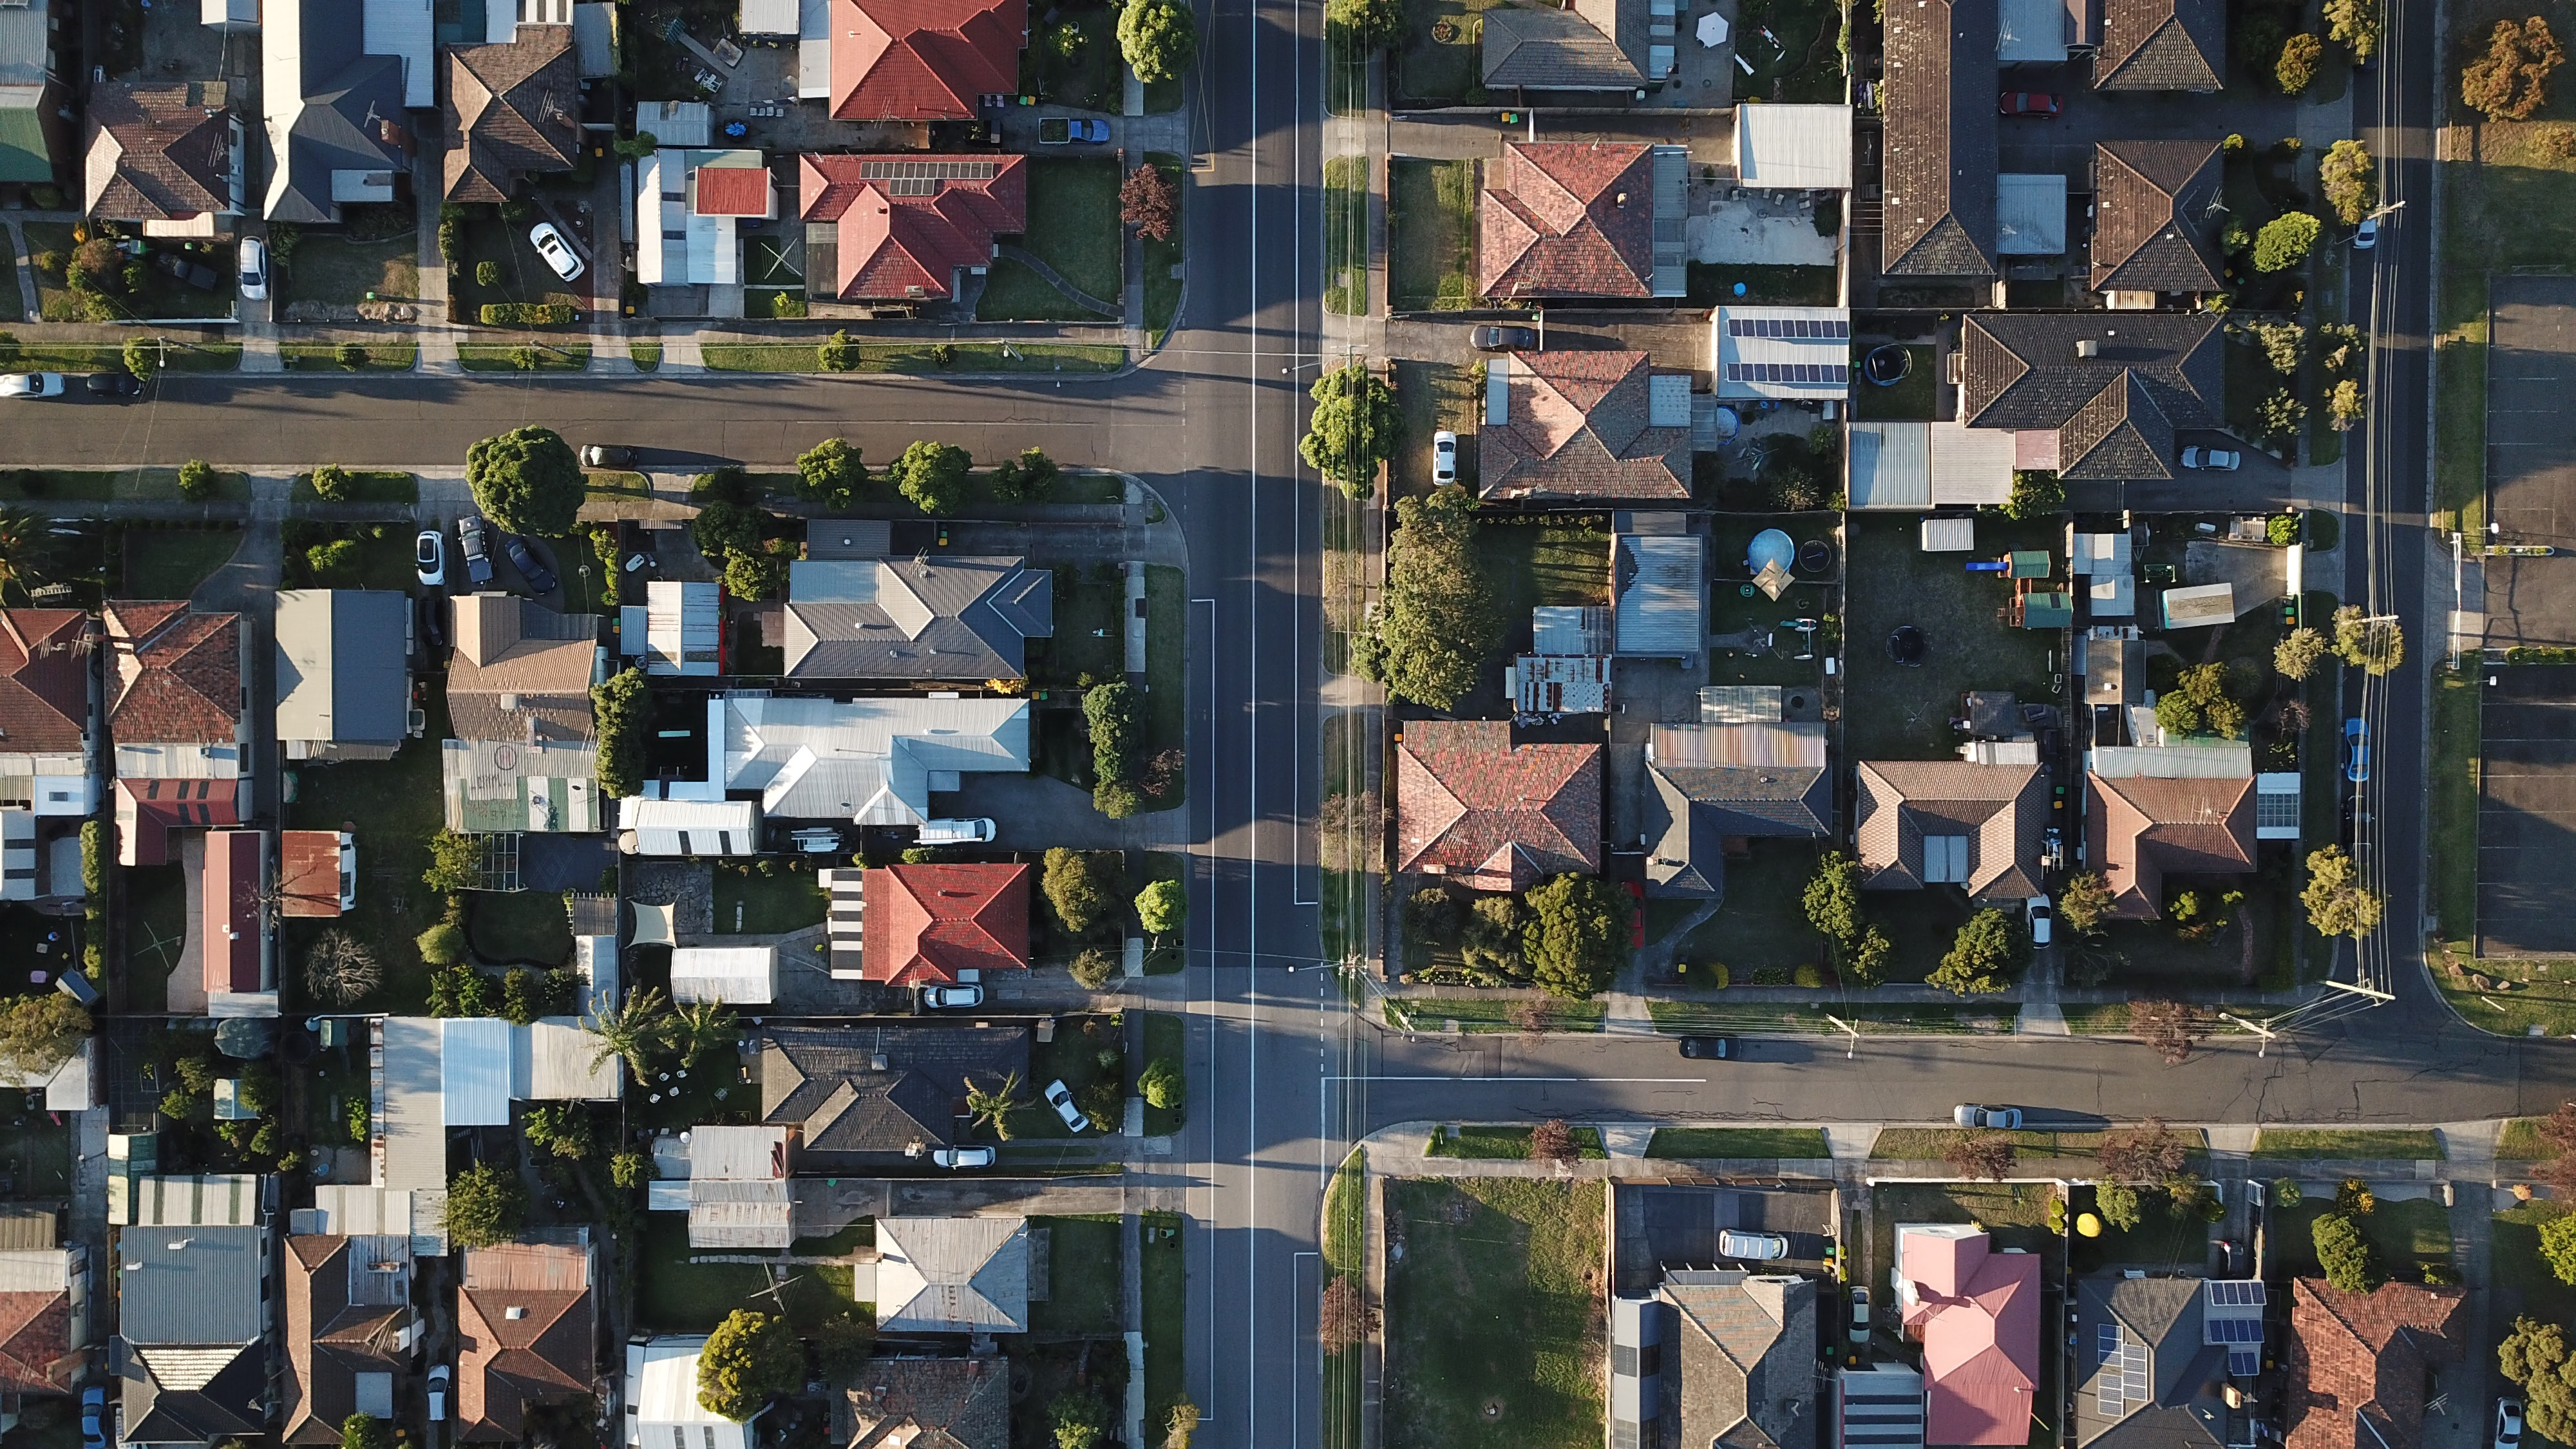

In [1]:
from IPython.display import Image
Image(filename = './tom-rumble-houses.jpg')
#Photo by [Tom Rumble](https://unsplash.com/@tomrumble?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText) on [Unsplash](https://unsplash.com/s/photos/houses?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText)

### Executive Summary

This project was was to predict housing prices for Ames, Iowa, given a dataset from the Ames, Iowa Assessor's Office containing information on houses sold between 2006-2010 ([data dictionary and information can be found here](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt).) My challenge was to build a linear regression model that would most accurately predict housing prices (given 80 housing features to select from and model with).

Key decisions I made during the modeling process:

**1. Filled null values with 0:** I didn't drop columns with significant null values. When I examined the columns with nulls, I found most of them weren't really reflecting missing information but were input as 'NA' because a house didn't have that feature (ex. pool). I didn't feel it was necessary to treat categorical and numerical columns differently when filling 'null' cells with 0 because I ultimately dummied out the categorical data anyway.

**2. Dropped Outliers:** The data dictionary as well as subplots of the nominal data columns provided a clue on outliers in the data. Plotting sale price against above grade living area  and lot area narrow down the data in the dataset. According to the data dictionary, it's likely the outliers in our data were from unusual partial sales of large properties. I chose to remove the outliers to make the model better predict the majority of housing prices, and this did improve my model's scores. 

**4. Feature Selection:** I had two feature models for my first model, I only included features that had an affect on the sale price according to an OLS hypothesis test. For my second feature model, I used every numerical feature and created a dummy columns dataframe  for nominal and ordinal features which was then concatinated to the trainning and testing dataframes. There were other features that I modified (ex. changed year built to decade and made this categorical) but in general I didn't drop features from the model. I scaled all the features but only used used polynomial features on the second features lasso model.

**5. Normalizing Features:** Plotting the distribution of sale prices, there was a strong positive skew that was going to impact the skew of my residuals. I dealt with this by taking the natural log of saleprice (and reversing the log with np.exp after making predictions to convert them back into sale prices at the end) for the first feature models. I did not normalize the saleprice distribution for the second features model. I did normalize a positive skew first floor square foot distribution with a natural log to correct a positive skew on both features models.

**6. Linear, Lasso, Ridge Regression :** I decided to use a linear, lasso, and ridge regression for the two feature selections I made in order to explore the best possible R2 results. The following were the cross validated scores for both features:

#### Features 1

```
=================================Linear Regression Trainning Model==================================
R2 accuracy scores: [0.8143551  0.8561741  0.85683833 0.78311332 0.8468853 ]
Mean R2 accuracy percentage score: 83.15%
======================================= LASSO Trainning Model=======================================
R2 accuracy scores: [0.81370306 0.8562642  0.85549358 0.78330549 0.84813553]
Mean R2 accuracy percentage score: 83.14%
====================================== Ridge Trainning Model =======================================
R2 accuracy scores: [0.81334599 0.85632417 0.85690038 0.78303623 0.84709909]
Mean R2 accuracy percentage score: 83.13%
```

#### Features 2

```
=================================Linear Regression Trainning Model==================================
R2 accuracy scores: [0.93107482 0.90936166 0.8927695  0.92091675 0.91120928]
Mean R2 accuracy percentage score: 91.31%
====================================== Ridge Trainning Model =======================================
R2 accuracy scores: [-0.07766958 -0.0731773  -0.02480281 -0.07054359 -0.00858686]
Mean R2 accuracy percentage score: 91.36%
=======================================LASSO Trainning Model =======================================
R2 accuracy scores: [0.93183718 0.9067743  0.89368633 0.93125707 0.3766999 ]
Mean R2 accuracy percentage score: 80.81%
```


### Problem Statement

Using the Ames Housing Data from 2006-2010, build a linear regression model that will most accurately predict housing prices (given 80 housing features to select from and model with.)

## Contents

**A.** [**Importing & EDA**](#lim)
  1.  [Library Imports](#imports)
  2.  [Data Read In](#read-in)
  2.  [Initial Exploratory Data Analysis](#initial-eda)
  3.  [Correlations between Saleprice and House Features](#correl)
  4.  [Name Nominal, Numerical, Ordinal, and the Target Columns](#targ-col)
  5.  [Explore Numerical Columns](#num-col)
  6.  [Explore the Relationship Between the Nominal Values and Sale Price](#nom-sale)
  7.  [Initiate a Hypothesis Test of the Numeric Columns](#hypo)
  

**B.** [**Feature Engineering & Selection**](#feat-eng)
  8.  [Explore & filter dataframe to remove outliers](#filter)
  9.  [Nomalize distribution of right skewed column](#norm-right)
  10. [Dummy values for nominal data columns](#dummy)
  
**C.** [**Modeling & Visualizations & Predictions**](#model-t1)
  11.  [Model Testing, Fitting, and Evaluation for Features_1](#model)
  12.  [Model Cross Validations for Features 1](#cross-val1)
  13.  [Linear Regression Model for Features 1](#lr-feat1)
  14.  [LASSO Model for Features 1](#lasso-feat1)
  16.  [Ridge Model for Features 1](#ridge-feat1)
  17.  [Model Cross Validations for Features 2](#model-t2)
  18.  [Model Testing, Fitting, and Evaluation for Features 2](#model-t2)
  19.  [Linear Regression Model for Features 2](#lr-feat2)
  20.  [Ridge Model for Features 2](#ridge-feat2)
  21.  [LASSO Model for Features 2](#lasso-feat2)

**E.** [**Final Thoughts**](#final)

# Importing & EDA <a name="lim"></a>

# Library Imports <a name="imports"></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm


%matplotlib inline


### Read In Data <a name="read-in"></a>

In [3]:
train = pd.read_csv('./datasets/train.csv',na_values='',keep_default_na=False)
test = pd.read_csv('./datasets/test.csv',na_values='',keep_default_na=False)

### Initial Exploratory Data Analysis <a name="initial-eda"></a>

In [4]:
#I check the shape of the trainning datea
train.shape

(2051, 81)

In [5]:
#I check the shape of the testing datae
test.shape

(878, 80)

In [6]:
#I check the columns of the trainning data
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [7]:
#I check the columns of the testing data
test.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [8]:
#I preview the trainning data
train.head(3)

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave    NA   
1  544  531379050           60        RL          43.0     11492   Pave    NA   
2  153  535304180           20        RL          68.0      7922   Pave    NA   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0      NA    NA   
1       IR1          Lvl  ...            0         0      NA    NA   
2       Reg          Lvl  ...            0         0      NA    NA   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0           NA        0       3    2010        WD      130500  
1           NA        0       4    2009        WD      220000  
2           NA        0       1    2010        WD      109000  

[3 rows x 81 columns]

In [9]:
#I preview the testing data
test.head(3)

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   

  Alley Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area Pool QC  \
0  Grvl       Reg          Lvl  ...          0            0         0      NA   
1    NA       IR1          Lvl  ...          0            0         0      NA   
2    NA       IR1          Lvl  ...          0            0         0      NA   

  Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  
0    NA           NA        0       4     2006        WD   
1    NA           NA        0       8     2006        WD   
2    NA           NA        0       9     2006        New  

[3 rows x 80 columns]

In [10]:
#I check the datatypes for each column
train.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

In [11]:
#I check trainning data for null values
train.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

In [12]:
#I fill the null values
train.fillna(0, inplace = True)
test.fillna(0, inplace=True)

In [13]:
train.isnull().sum()

Id              0
PID             0
MS SubClass     0
MS Zoning       0
Lot Frontage    0
               ..
Misc Val        0
Mo Sold         0
Yr Sold         0
Sale Type       0
SalePrice       0
Length: 81, dtype: int64

In [14]:
#I check training data statistics
train.describe()

Id           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2051.000000  2.051000e+03  2051.000000   2051.000000    2051.000000   
mean   1474.033642  7.135900e+08    57.008776     57.944417   10065.208191   
std     843.980841  1.886918e+08    42.824223     33.137332    6742.488909   
min       1.000000  5.263011e+08    20.000000      0.000000    1300.000000   
25%     753.500000  5.284581e+08    20.000000     43.500000    7500.000000   
50%    1486.000000  5.354532e+08    50.000000     63.000000    9430.000000   
75%    2198.000000  9.071801e+08    70.000000     78.000000   11513.500000   
max    2930.000000  9.241520e+08   190.000000    313.000000  159000.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2051.000000   2051.000000  2051.000000     2051.000000   2051.000000   
mean       6.112140      5.562165  1971.708922     1984.190151     98.626524   
std        1.426271      1.104497    30.177889       21.036250    174.324690   
min        1.000000      1.000000  1872.000000     1950.000000      0.000000   
25%        5.000000      5.000000  1953.500000     1964.500000      0.000000   
50%        6.000000      5.000000  1974.000000     1993.000000      0.000000   
75%        7.000000      6.000000  2001.000000     2004.000000    159.000000   
max       10.000000      9.000000  2010.000000     2010.000000   1600.000000   

       ...  Wood Deck SF  Open Porch SF  Enclosed Porch   3Ssn Porch  \
count  ...   2051.000000    2051.000000     2051.000000  2051.000000   
mean   ...     93.833740      47.556802       22.571916     2.591419   
std    ...    128.549416      66.747241       59.845110    25.229615   
min    ...      0.000000       0.000000        0.000000     0.000000   
25%    ...      0.000000       0.000000        0.000000     0.000000   
50%    ...      0.000000      27.000000        0.000000     0.000000   
75%    ...    168.000000      70.000000        0.000000     0.000000   
max    ...   1424.000000     547.000000      432.000000   508.000000   

       Screen Porch    Pool Area      Misc Val      Mo Sold      Yr Sold  \
count   2051.000000  2051.000000   2051.000000  2051.000000  2051.000000   
mean      16.511458     2.397855     51.574354     6.219893  2007.775719   
std       57.374204    37.782570    573.393985     2.744736     1.312014   
min        0.000000     0.000000      0.000000     1.000000  2006.000000   
25%        0.000000     0.000000      0.000000     4.000000  2007.000000   
50%        0.000000     0.000000      0.000000     6.000000  2008.000000   
75%        0.000000     0.000000      0.000000     8.000000  2009.000000   
max      490.000000   800.000000  17000.000000    12.000000  2010.000000   

           SalePrice  
count    2051.000000  
mean   181469.701609  
std     79258.659352  
min     12789.000000  
25%    129825.000000  
50%    162500.000000  
75%    214000.000000  
max    611657.000000  

[8 rows x 39 columns]

In [15]:
#I check the statistics of the sale prices, which is ultimately what I'm trying to predict.
train['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

### Correlations between Saleprice and House Features <a name="correl"></a>

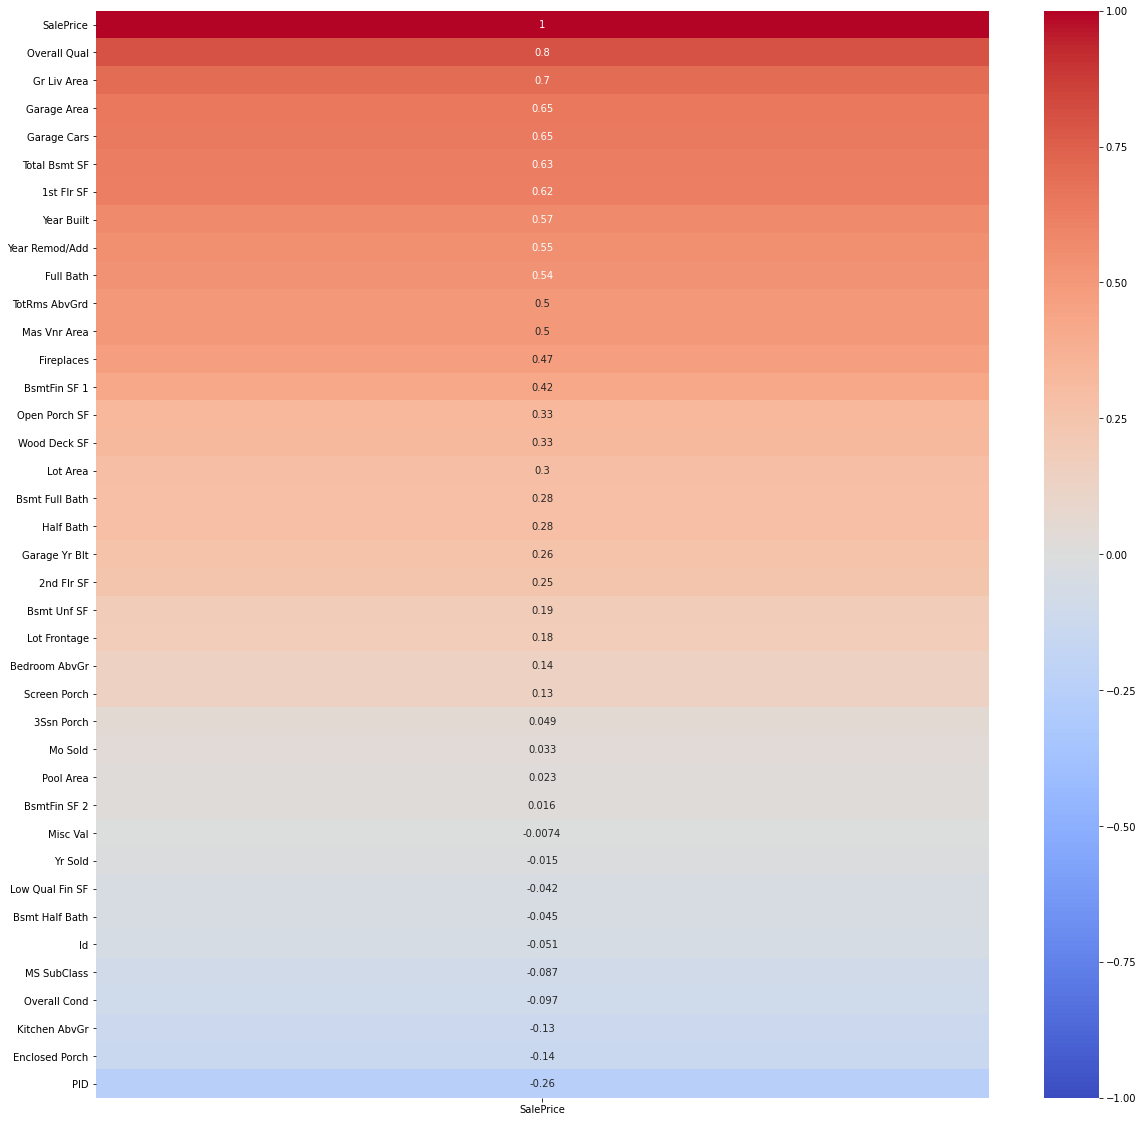

In [16]:

fig, ax = plt.subplots(figsize=(20, 20))
plt.fontsize = 20
sns.heatmap(train.corr()[['SalePrice']].sort_values("SalePrice", ascending = False), annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1);

#### Name Nominal, Numerical, Ordinal, and the Target Columns <a name="targ-col"></a>

In [17]:
Nominal = ['Sale Type','Neighborhood','Bldg Type', 'House Style','Foundation'] # no sale condition from jse site
# Bldg Type & Sale Type
# split bldg type - 1Fam, TwnhmE, Else
# split Sale Type - New, Oth&CWD, Else
# I want to use neighborhood, but will need extra time to group based on neighborhood prices (pivots)
Numerical = ['Lot Area','Year Built', 'Year Remod/Add', 
             'BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
             '2nd Flr SF','Gr Liv Area', 'Bsmt Full Bath',
             'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
             'Kitchen AbvGr','TotRms AbvGrd',
             'Garage Area','Wood Deck SF', 'Open Porch SF','Screen Porch',
             'Mo Sold', 'Yr Sold' ,'SalePrice']
Ordinal = ['Overall Qual','Overall Cond','Paved Drive']
# only use overall 'overall qual'
Target = ['SalePrice']

In [18]:
Nom_train = train[Nominal]
Num_train = train[Numerical]
Ord_train = train[Ordinal]

In [19]:
def subplot_scatter(dataframe, list_of_columns, list_of_xlabels, figsize):
    nrows = int(np.ceil(len(list_of_columns) / 3))

    fig, ax = plt.subplots(nrows = nrows, ncols = 3, figsize = figsize)
          
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns):
        colors = ['seagreen', 'cadetblue', 'lightgreen', 'orange', 'navy', 'plum', 'sandybrown', 'sienna', 
                  'indianred', 'darkgoldenrod', 'deeppink', 'violet', 'saddlebrown', 'teal', 'midnightblue',
                'steelblue', 'orchid', 'mediumspringgreen', 'olivedrab', 'firebrick', 'skyblue', 'fuchsia', 'crimson', 'limegreen']
        ax[i].scatter(dataframe[column], dataframe['SalePrice'], color = colors[i], alpha = 0.3) 

    for enum, xlabel in enumerate(list_of_xlabels): 
        ax[enum].set_xlabel(xlabel, fontsize = 12)
        ax[enum].set_ylabel('Frequency', fontsize = 12)


In [20]:
def subplot_histograms(dataframe, list_of_columns, list_of_xlabels, figsize):
    nrows = int(np.ceil(len(list_of_columns) / 3)) 

    fig, ax = plt.subplots(nrows = nrows, ncols = 3, figsize = figsize) 
          
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns): 
        colors = ['seagreen', 'cadetblue', 'lightgreen', 'orange', 'navy', 'plum', 'sandybrown', 'sienna', 
                  'indianred', 'darkgoldenrod', 'deeppink', 'violet', 'saddlebrown', 'teal', 'midnightblue',
                'steelblue', 'orchid', 'mediumspringgreen', 'olivedrab', 'firebrick', 'skyblue', 'fuchsia', 'crimson', 'limegreen']
        ax[i].hist(dataframe[column], color = colors[i], alpha = 0.3) 

    for enum, xlabel in enumerate(list_of_xlabels): 
        ax[enum].set_xlabel(xlabel, fontsize = 12)
        ax[enum].set_ylabel('Frequency', fontsize = 12)


#### I Explore Numerical Columns <a name="num-col"></a>

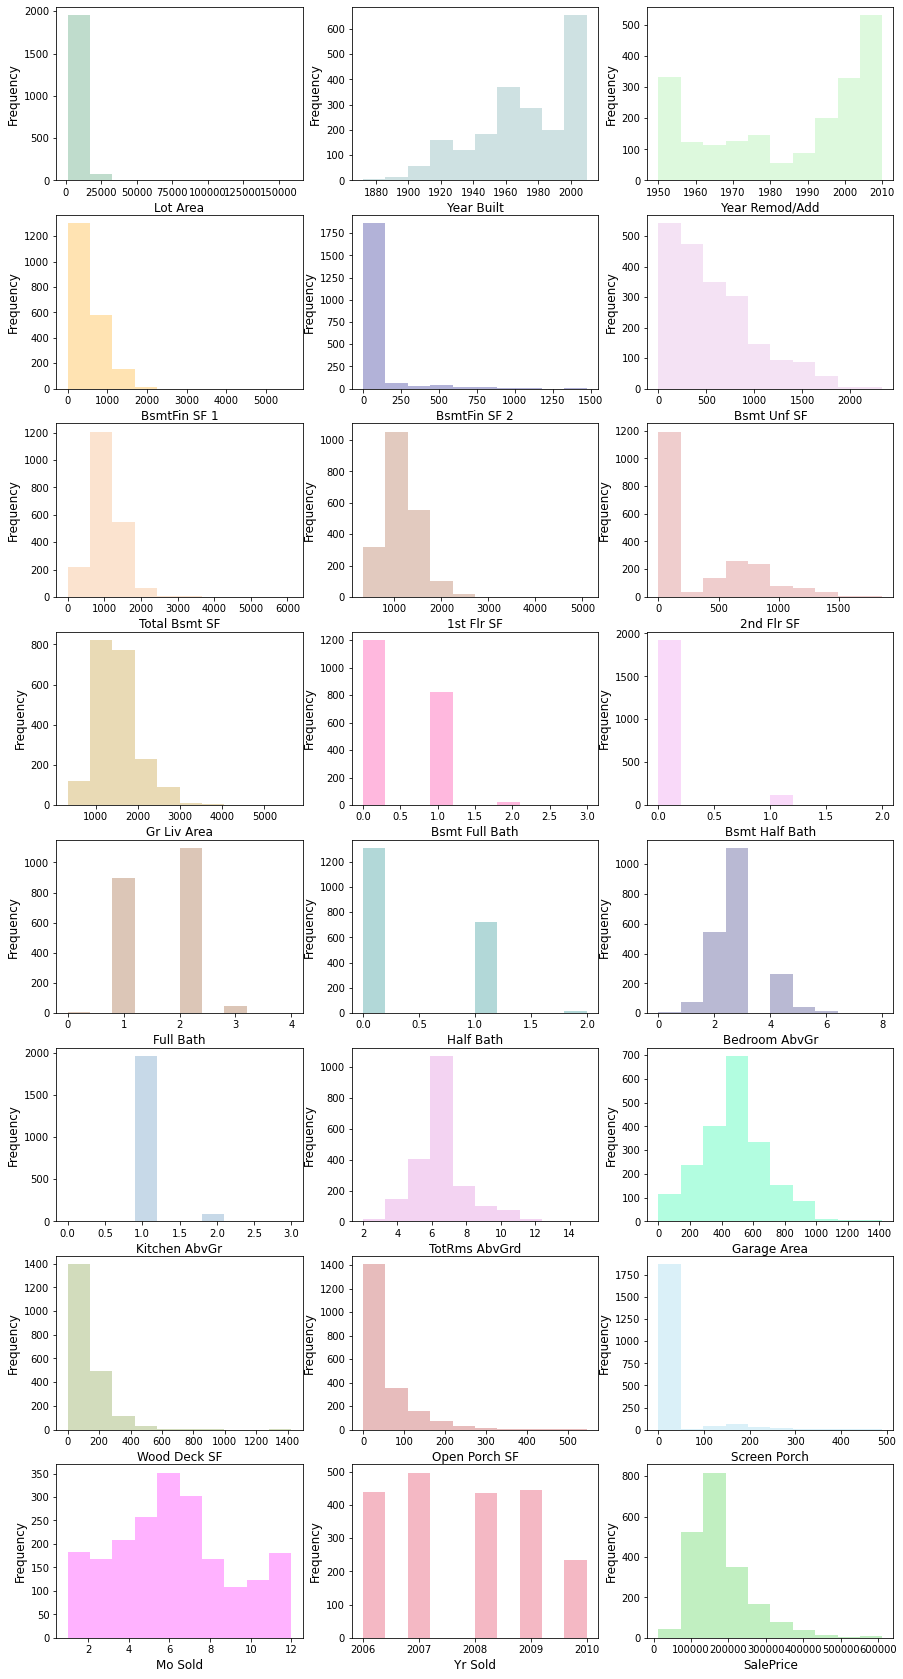

In [21]:
subplot_histograms(Num_train, Numerical, Numerical, (15,30))

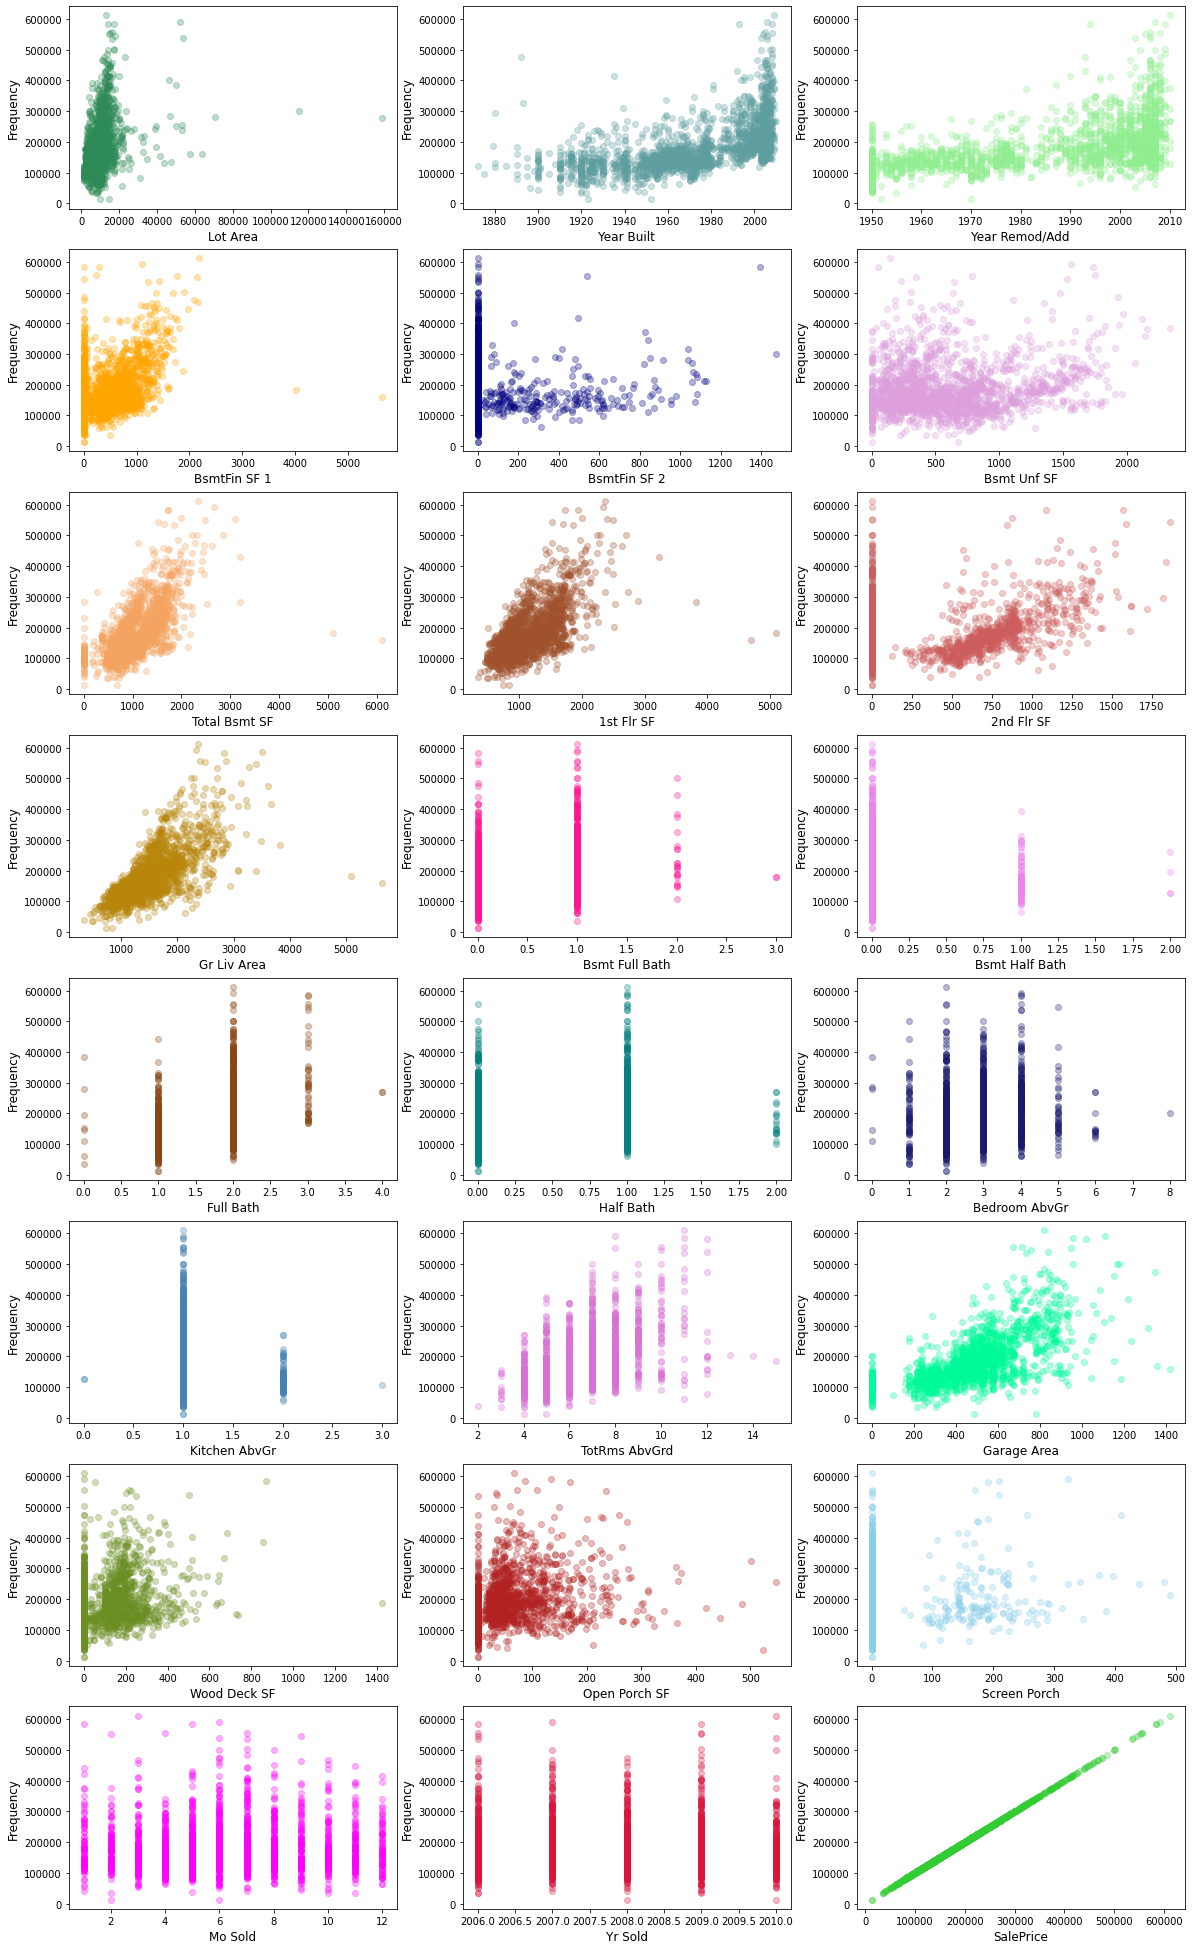

In [22]:
subplot_scatter(Num_train, Numerical, Numerical, (20,35))

#### I Explore the Relationship Between the Nominal Values and Sale Price  <a name="nom-sale"></a>

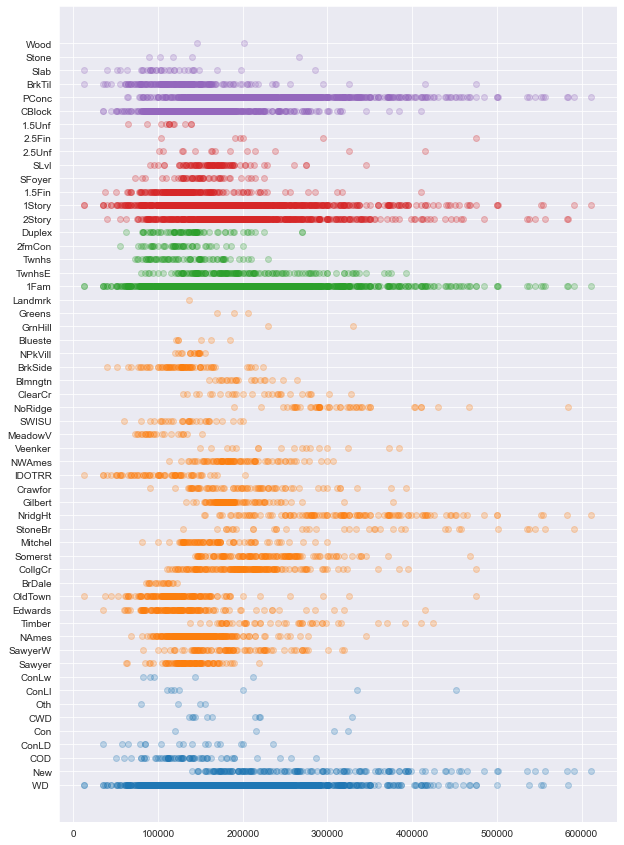

In [23]:
plt.figure(figsize = (10,15))
# sns.palettes('Blues')
sns.set_style('darkgrid')
# plt.xkcd()
for i in Nom_train:
    plt.scatter(train['SalePrice'],Nom_train[i],alpha=0.25)


#### I Initiate a Hypothesis Test of the Numeric Columns <a name="hypo"></a>

In [24]:
#Model summary was created with reference to Lesson 3.06 of GA's DSI program

columns = ['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
        'Condition 1', 'Condition 2', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Exter Qual', 'Exter Cond', 
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Garage Cars', 'Garage Area', 'Paved Drive',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'
         ]

X = train[columns]._get_numeric_data()
X = sm.add_constant(X)
y = train.SalePrice
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     255.1
Date:                Thu, 13 Aug 2020   Prob (F-statistic):               0.00
Time:                        17:08:54   Log-Likelihood:                -24413.
No. Observations:                2051   AIC:                         4.889e+04
Df Residuals:                    2019   BIC:                         4.907e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.928e+07   1.06e+07      3.701      0.000    1.85e+07    6.01e+07
Id                -31.0816      8.331     -3.731      0.000     -47.419     -14.744
PID              1.063e-05   8.13e-06      1.307      0.191   -5.32e-06    2.66e-05
MS SubClass      -105.5863     22.453     -4.702      0.000    -149.621     -61.552
Lot Area            0.2467      0.136      1.810      0.070      -0.021       0.514
Year Built        439.7810     46.501      9.457      0.000     348.585     530.977
Year Remod/Add    507.4466     53.134      9.550      0.000     403.244     611.649
BsmtFin SF 1       14.8438      2.131      6.965      0.000      10.664      19.023
BsmtFin SF 2       -0.3645      3.859     -0.094      0.925      -7.932       7.203
Bsmt Unf SF         4.3223      2.004      2.156      0.031       0.391       8.253
Total Bsmt SF      18.8015      2.782      6.759      0.000      13.347      24.257
1st Flr SF         29.7812      5.036      5.914      0.000      19.905      39.658
2nd Flr SF         25.8912      4.653      5.565      0.000      16.767      35.016
Low Qual Fin SF   -19.9803     12.132     -1.647      0.100     -43.772       3.812
Gr Liv Area        35.6922      4.824      7.398      0.000      26.231      45.153
Bsmt Full Bath   7914.5160   2241.445      3.531      0.000    3518.730    1.23e+04
Bsmt Half Bath  -1425.9802   3407.028     -0.419      0.676   -8107.638    5255.678
Full Bath        1743.7989   2383.466      0.732      0.464   -2930.510    6418.108
Half Bath       -1417.2846   2359.709     -0.601      0.548   -6045.004    3210.435
Bedroom AbvGr   -1.145e+04   1421.660     -8.052      0.000   -1.42e+04   -8659.796
Kitchen AbvGr   -2.722e+04   4691.739     -5.802      0.000   -3.64e+04    -1.8e+04
TotRms AbvGrd    5563.1921   1074.933      5.175      0.000    3455.098    7671.286
Fireplaces       7620.4023   1547.062      4.926      0.000    4586.397    1.07e+04
Garage Cars      6104.2518   2540.899      2.402      0.016    1121.194    1.11e+04
Garage Area        28.2763      8.865      3.190      0.001      10.890      45.662
Wood Deck SF       27.9483      6.905      4.048      0.000      14.407      41.489
Open Porch SF      10.4269     13.298      0.784      0.433     -15.653      36.507
Enclosed Porch     29.0569     14.720      1.974      0.049       0.188      57.926
3Ssn Porch         16.6473     31.835      0.523      0.601     -45.785      79.080
Screen Porch       88.6443     14.528      6.102      0.000      60.153     117.135
Pool Area        -128.6580     21.752     -5.915      0.000    -171.316     -86.000
Misc Val          -13.2723      1.444     -9.190      0.000     -16.105     -10.440
Mo Sold           152.9022    297.102      0.515      0.607    -429.757     735.561
Yr Sold         -2.046e+04   5284.177     -3.872      0.000

# Feature Engineering & Selection<a name="feat-eng"></a>

#### I explore filter the dataframe to remove outliers, vertical line is the cutoff I decided based off of model R^2 scores <a name="filter"></a>

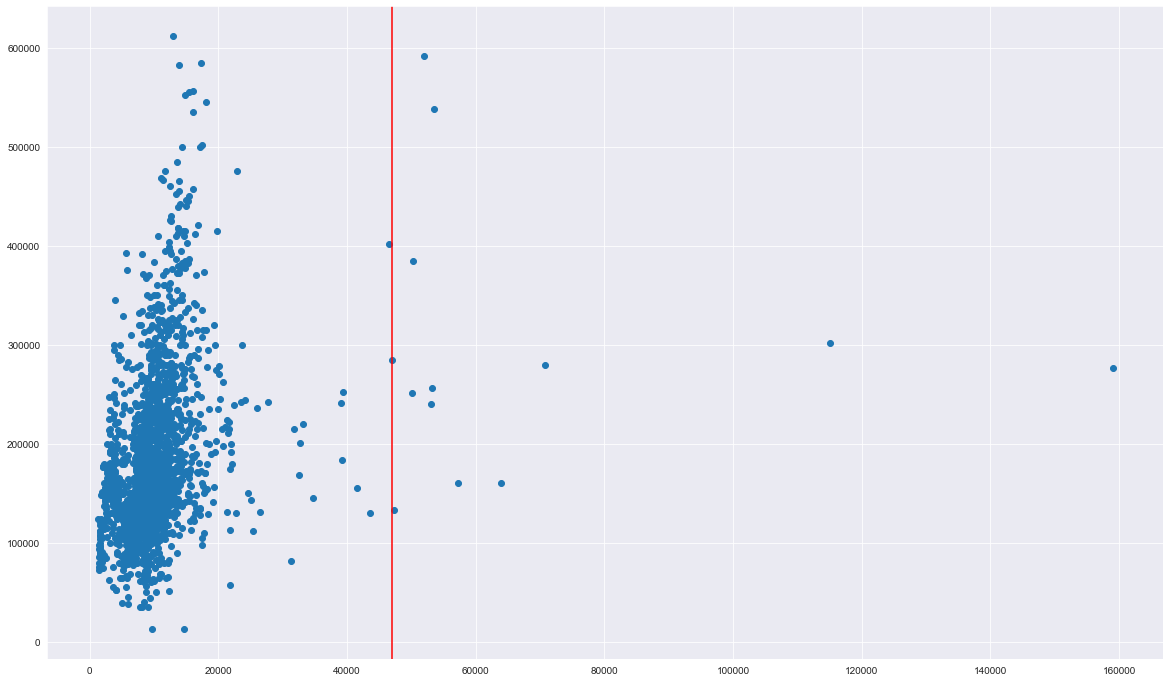

In [25]:
#identify the outliers in lot area
plt.figure(figsize = (20, 12))
plt.scatter(x = train['Lot Area'], y = train['SalePrice'])
plt.axvline(47000,  label='pyplot vertical line', color = 'red');

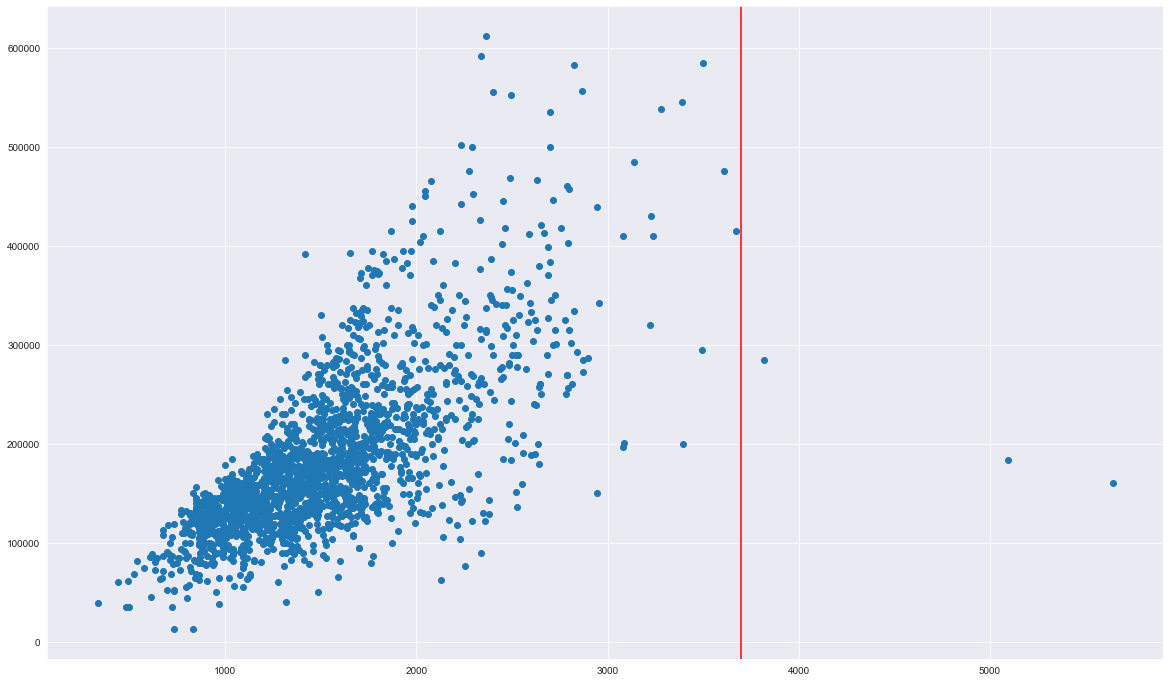

In [26]:
#identify the outliers in gr Living Area
plt.figure(figsize = (20, 12))
plt.scatter(x = train['Gr Liv Area'], y = train['SalePrice'])
plt.axvline(3700,  label='pyplot vertical line', color = 'red');

In [27]:
train = train[(train['Gr Liv Area'] < 3700) & (train['Lot Area']<47000)]

#### I nomalize distribution of right skewed '1st Flr SF' column with log function <a name="norm-right"></a>

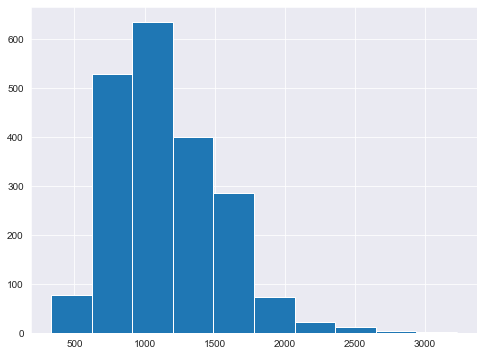

In [28]:
plt.figure(figsize = (8, 6))
train['1st Flr SF'].hist();


In [29]:
#I normalize the feature on training and testing data
train['1st Flr SF'] = np.log(train['1st Flr SF'])
test['1st Flr SF'] = np.log(test['1st Flr SF'])

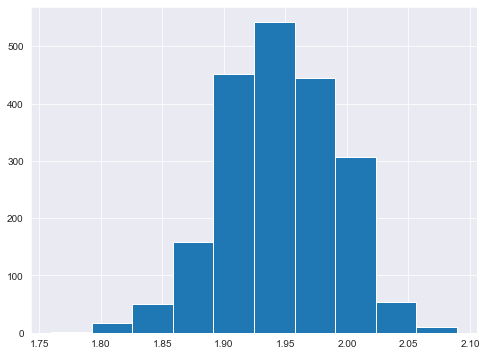

In [30]:
plt.figure(figsize = (8, 6))
np.log(train['1st Flr SF']).hist();


#### I create dummy values for nominal data columns <a name="dummy"></a>

In [31]:
Nom_Ord = ['Sale Type','Neighborhood','Bldg Type', 'House Style','Foundation','Overall Qual']

In [32]:
train = pd.get_dummies(data=train,columns=Nom_Ord,drop_first=True)
test = pd.get_dummies(data=test,columns=Nom_Ord,drop_first=True)

In [33]:
#I check if the dummies have been added
print(train.shape)
print(test.shape)

(2037, 135)
(878, 132)


In [34]:
#identify columns not in common
test.columns ^ train.columns

Index(['Neighborhood_GrnHill', 'Neighborhood_Landmrk', 'Overall Qual_2',
       'Sale Type_VWD', 'SalePrice'],
      dtype='object')

## Model Testing, Fitting, and Evaluation for Features_1 <a name="model-t1"></a>

#### Setup train, test, split features_1 models

In [35]:
#hypothesis test p < 0.05 columns, not using dummy columns
features_1 = ['MS SubClass','Lot Area',  'Year Remod/Add', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
            '2nd Flr SF','Low Qual Fin SF','Gr Liv Area', 'Half Bath', 'Bedroom AbvGr','Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Area',
            'Wood Deck SF', 'Open Porch SF', 'Screen Porch',  'Misc Val']
X_2 = train[features_1]
y = train['SalePrice']

In [36]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour',
       ...
       'Foundation_Wood', 'Overall Qual_2', 'Overall Qual_3', 'Overall Qual_4',
       'Overall Qual_5', 'Overall Qual_6', 'Overall Qual_7', 'Overall Qual_8',
       'Overall Qual_9', 'Overall Qual_10'],
      dtype='object', length=135)

In [37]:
train.head(2)

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           0.0     13517   Pave    NA   
1  544  531379050           60        RL          43.0     11492   Pave    NA   

  Lot Shape Land Contour  ... Foundation_Wood Overall Qual_2 Overall Qual_3  \
0       IR1          Lvl  ...               0              0              0   
1       IR1          Lvl  ...               0              0              0   

  Overall Qual_4 Overall Qual_5  Overall Qual_6  Overall Qual_7  \
0              0              0               1               0   
1              0              0               0               1   

   Overall Qual_8 Overall Qual_9 Overall Qual_10  
0               0              0               0  
1               0              0               0  

[2 rows x 135 columns]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y)

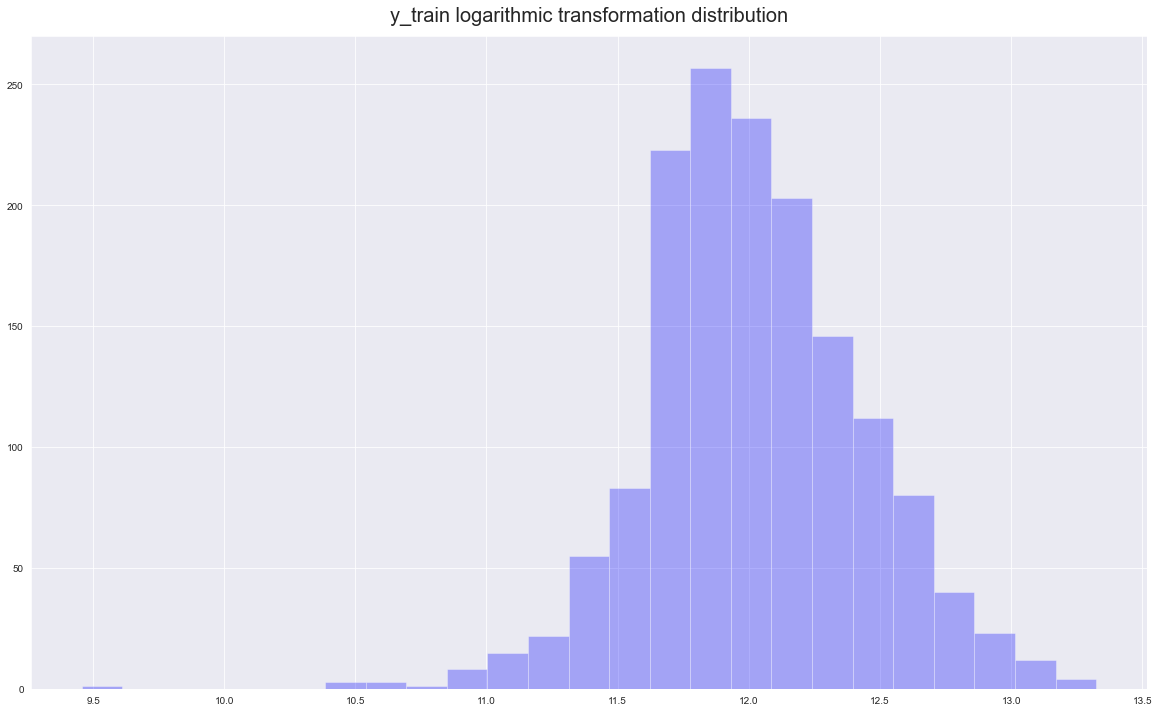

In [39]:
# transformation of y value is creating nicer predictions, I decide to use a log tranformation
plt.figure(figsize = (20, 12))
plt.title('y_train logarithmic transformation distribution', size = 20, pad = 15)
np.log(y_train).hist(color='blue',bins=25, alpha = 0.3);

In [40]:
y_train_log = np.log(y_train)

#### I initialize standard scaler

In [41]:
#the following sections were created with help from Lessons 4.01 and 4.02 of GA's DSI program
sc = StandardScaler()
sc.fit(X_train)

Z_train = sc.transform(X_train)
Z_test = sc.transform(X_test)

In [42]:
print(f'Z_train shape is: {Z_train.shape}')
print(f'y_train shape is: {y_train.shape}')
print(f'Z_test shape is: {Z_test.shape}')
print(f'y_test shape is: {y_test.shape}')

Z_train shape is: (1527, 21)
y_train shape is: (1527,)
Z_test shape is: (510, 21)
y_test shape is: (510,)


#### I initialize and fit models

In [43]:
lr = LinearRegression();
lasso = LassoCV()
ridge = RidgeCV()
lr.fit(X_train, y_train)

LinearRegression()

## Model Cross Validations for Features 1 <a name="cross-val1"></a>

In [44]:
# cross_val_scores are sanity tests on how the data will perform on unseen data

print("Linear Regression Trainning Model".center(100, "="))
print(f'R2 accuracy scores: {cross_val_score(lr, Z_train, y_train_log, cv = 5)}')
print(f'Mean R2 accuracy percentage score: {round(cross_val_score(lr, Z_train, y_train_log,cv = 5).mean() * 100, 2)}%')

print('')
print(" LASSO Trainning Model".center(100, "="))
print(f'R2 accuracy scores: {cross_val_score(lasso, Z_train, y_train_log, cv = 5)}')
print(f'Mean R2 accuracy percentage score: {round(cross_val_score(lasso, Z_train, y_train_log,cv = 5).mean() * 100, 2)}%')

print('')
print(" Ridge Trainning Model ".center(100, "="))
print(f'R2 accuracy scores: {cross_val_score(ridge, Z_train,y_train_log, cv = 5)}')
print(f'Mean R2 accuracy percentage score: {round(cross_val_score(ridge, Z_train,y_train_log,cv = 5).mean() * 100, 2)}%')

=================================Linear Regression Trainning Model==================================
R2 accuracy scores: [0.83731522 0.86430898 0.77135424 0.83173771 0.85774918]
Mean R2 accuracy percentage score: 83.25%

======================================= LASSO Trainning Model=======================================
R2 accuracy scores: [0.83997357 0.86481734 0.7712925  0.83164128 0.85604486]
Mean R2 accuracy percentage score: 83.28%

====================================== Ridge Trainning Model =======================================
R2 accuracy scores: [0.83797184 0.8644572  0.77097947 0.8314127  0.85631561]
Mean R2 accuracy percentage score: 83.22%


## Linear Regression Model for Features 1 <a name="lr-feat1"></a>


#### I fit and predit for model

In [45]:
lr.fit(Z_train,y_train_log)
lr_pred = lr.predict(Z_test)
lr_pred = np.exp(lr_pred)

#### Model Statistics

In [46]:
print("Linear Regression Model Trainning and Testing".center(100, "="))
print(f'R2 for Linear Regression Training: {lr.score(Z_train,y_train_log)}')
print(f'R2 for Linear Regression Testing: {lr.score(Z_test,y_test)}')

print('')
print("Linear Regression Prediction Statistics".center(100, "="))

print(f'R2 for Linear Regression Prediction: {r2_score(y_test,lr_pred)}')

print(f'MSE for this Linear Regression model is: {mean_squared_error(y_test, lr_pred)}')
print(f'RMSE for this Linear Regression model is: {mean_squared_error(y_test, lr_pred)**0.5}')

===========================Linear Regression Model Trainning and Testing============================
R2 for Linear Regression Training: 0.8374916673185808
R2 for Linear Regression Testing: -5.2538015972733385

==============================Linear Regression Prediction Statistics===============================
R2 for Linear Regression Prediction: 0.8472052731572336
MSE for this Linear Regression model is: 951622560.5737321
RMSE for this Linear Regression model is: 30848.380193678437


#### Model Visualization

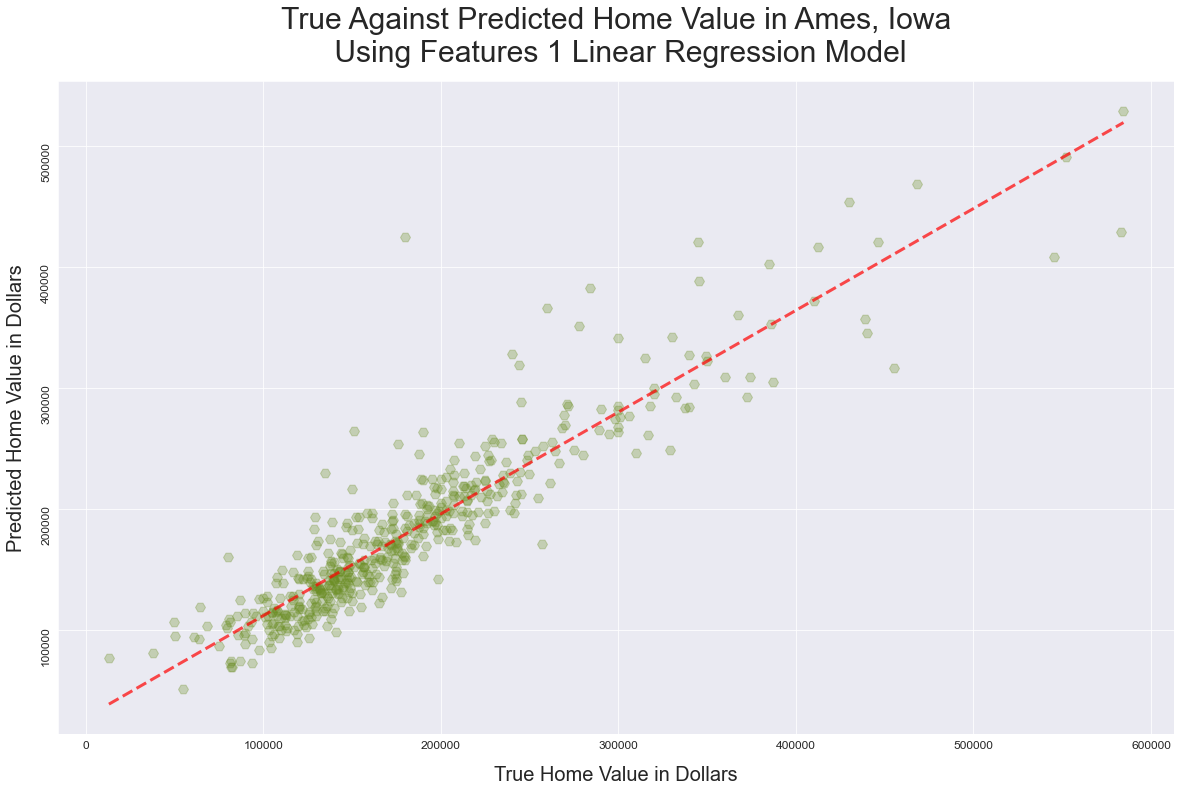

In [47]:
plt.figure(figsize = (20, 12))

plt.scatter(y_test, lr_pred, color ='olivedrab', alpha = 0.3, marker = 'H',s=100)
plt.xlabel('True Home Value in Dollars', size = 20, labelpad = 15)
plt.ylabel('Predicted Home Value in Dollars', size = 20, labelpad = 15)
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 90)
plt.title('True Against Predicted Home Value in Ames, Iowa\n Using Features 1 Linear Regression Model', size = 30, pad = 20)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, lr_pred, 1))(np.unique(y_test)),'--',color = 'red', linewidth = 3, alpha=0.7);

plt.savefig('./visualizations/True_vs_Predicted_Home_Value_in_Ames_Iowa_Using_a_Linear_Regression_Model_features_1.png')

## LASSO Model for Features 1<a name="lasso-feat1"></a>

#### I fit and predit for model

In [48]:
lasso.fit(Z_train, y_train_log)
lasso_pred = lasso.predict(Z_test)
lasso_pred = np.exp(lasso_pred)

#### Model Statistics

In [49]:
print("LASSO Model Trainning and Testing".center(100, "="))
print(f'Lasso Training R2:{lasso.score(Z_train, y_train_log)}')
print(f'Lasso Testing R2: {lasso.score(Z_test, y_test)}')

print('')
print("LASSO Model Prediction Statistics".center(100, "="))

print(f'Lasso Predicted R2:{r2_score(y_test,lasso_pred)}')

print(f'MSE for this LASSO model is: {mean_squared_error(y_test, lasso_pred)}')
print(f'RMSE for this LASSO model is: {mean_squared_error(y_test, lasso_pred)**0.5}')

=================================LASSO Model Trainning and Testing==================================
Lasso Training R2:0.8374611211460126
Lasso Testing R2: -5.253801598648593

=================================LASSO Model Prediction Statistics==================================
Lasso Predicted R2:0.847446321548415
MSE for this LASSO model is: 950121284.3714826
RMSE for this LASSO model is: 30824.037444362843


#### Model Visualization

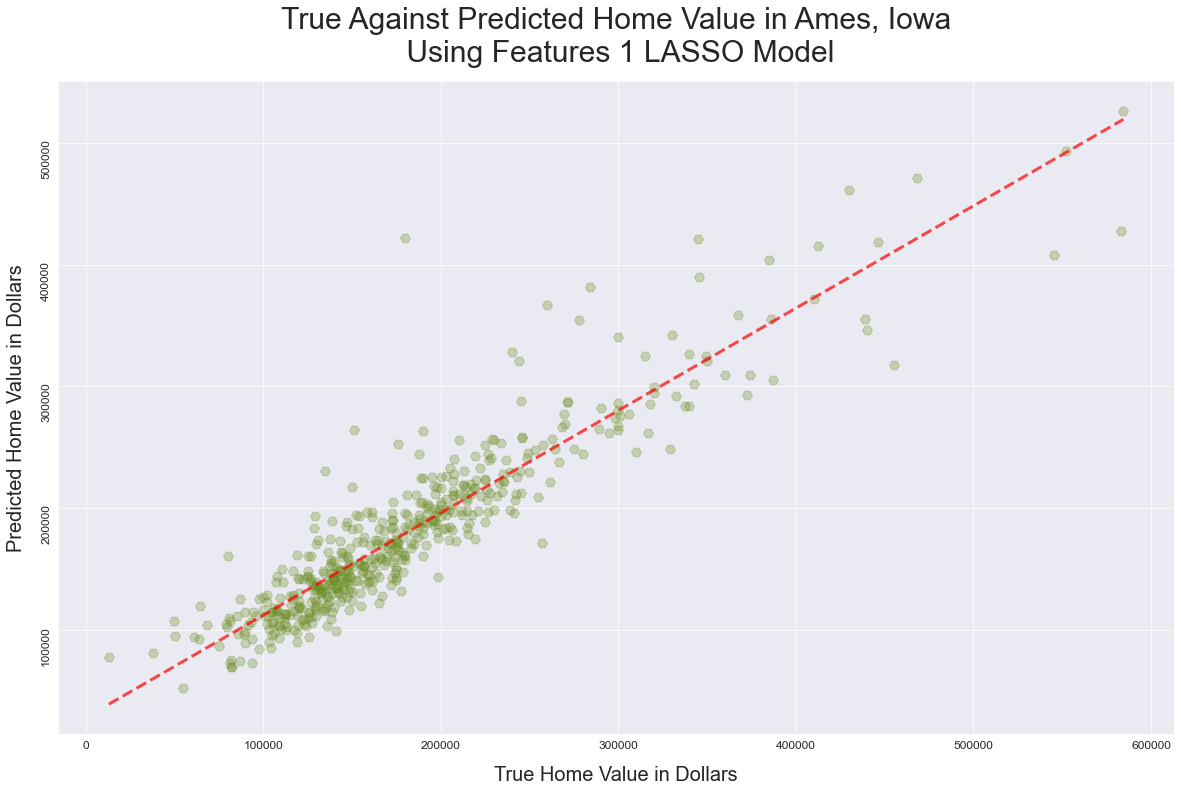

In [50]:
plt.figure(figsize = (20,12))

plt.scatter(y_test, lasso_pred, color ='olivedrab', alpha = 0.3, marker = 'H',s=100)
plt.xlabel('True Home Value in Dollars', size = 20, labelpad = 15)
plt.ylabel('Predicted Home Value in Dollars', size = 20, labelpad = 15)
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 90)
plt.title('True Against Predicted Home Value in Ames, Iowa\n Using Features 1 LASSO Model', size = 30, pad = 20)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, lasso_pred, 1))(np.unique(y_test)),'--',linewidth = 3, color = 'red',alpha=0.7);

plt.savefig('./visualizations/True_vs_Predicted_Home_Value_in_Ames_Iowa_Using_a_Lasso_Model_features_1.png')


## Ridge Model for Features 1<a name="ridge-feat1"></a>

#### I fit and Predict for Model

In [51]:
ridge.fit(Z_train, y_train_log)
ridge_pred = ridge.predict(Z_test)
ridge_pred = np.exp(ridge_pred)

#### Model Statistics

In [52]:
print("Ridge Model Trainning and Testing".center(100, "="))
print(f'R2 for Ridge Trainning: {ridge.score(Z_train, y_train_log)}')
print(f'R2 for Ridge Testing: {ridge.score(Z_test, y_test)}')

print('')
print("Ridge Model Prediction Statistics".center(100, "="))

print(f'R2 for this Ridge Prediction :{r2_score(y_test,ridge_pred)}')

print(f'MSE for this Ridge model is: {mean_squared_error(y_test, ridge_pred)}')
print(f'RMSE for this Ridge model is: {mean_squared_error(y_test, ridge_pred)**0.5}')

=================================Ridge Model Trainning and Testing==================================
R2 for Ridge Trainning: 0.8374870089412167
R2 for Ridge Testing: -5.2538015935204

=================================Ridge Model Prediction Statistics==================================
R2 for this Ridge Prediction :0.8473053331486861
MSE for this Ridge model is: 950999375.8130764
RMSE for this Ridge model is: 30838.277769892993


#### Model Visualization

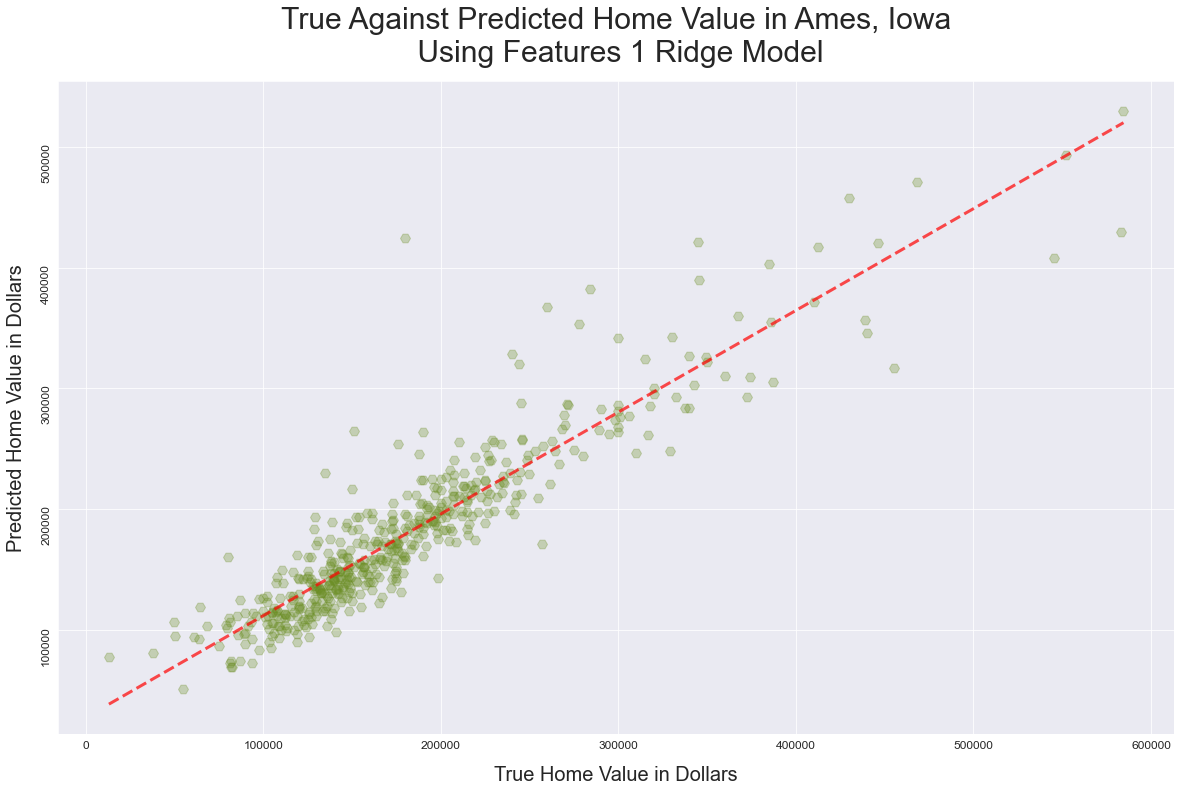

In [53]:
plt.figure(figsize = (20, 12))

plt.scatter(y_test, ridge_pred, color ='olivedrab', alpha = 0.3, marker = 'H',s=100)
plt.xlabel('True Home Value in Dollars', size = 20, labelpad = 15)
plt.ylabel('Predicted Home Value in Dollars', size = 20, labelpad = 15)
plt.title('True Against Predicted Home Value in Ames, Iowa\n Using Features 1 Ridge Model', size = 30, pad = 20)
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 90)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, ridge_pred, 1))(np.unique(y_test)),'--',linewidth = 3, color = 'red',alpha=0.7);
plt.savefig('./visualizations/True_vs_Predicted_Home_Value_in_Ames_Iowa_Using_a_Ridge_Model_features_1.png')

## Model Testing, Fitting, and Evaluation for Features 2 <a name="model-t2"></a>

#### Setup train, test, split features_2 model

Given the nominal value scatter plot I decide to exclude 'Neighborhood_GrnHill', 'Neighborhood_Landmrk', 'Overall Qual_2' from the features of my last model. This model creates individual columns for each feature in each column.

In [54]:
#features include the dummy columns
features_2 = [x for x in train.columns if x not in ['Neighborhood_GrnHill', 'Neighborhood_Landmrk', 'Overall Qual_2']]

train = train[features_2]
test = test.drop(columns=['Sale Type_VWD'])

In [55]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour',
       ...
       'Foundation_Stone', 'Foundation_Wood', 'Overall Qual_3',
       'Overall Qual_4', 'Overall Qual_5', 'Overall Qual_6', 'Overall Qual_7',
       'Overall Qual_8', 'Overall Qual_9', 'Overall Qual_10'],
      dtype='object', length=132)

In [56]:
train.head(2)

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           0.0     13517   Pave    NA   
1  544  531379050           60        RL          43.0     11492   Pave    NA   

  Lot Shape Land Contour  ... Foundation_Stone Foundation_Wood Overall Qual_3  \
0       IR1          Lvl  ...                0               0              0   
1       IR1          Lvl  ...                0               0              0   

  Overall Qual_4 Overall Qual_5  Overall Qual_6  Overall Qual_7  \
0              0              0               1               0   
1              0              0               0               1   

   Overall Qual_8 Overall Qual_9 Overall Qual_10  
0               0              0               0  
1               0              0               0  

[2 rows x 132 columns]

In [57]:
numerical_train = train._get_numeric_data()

In [58]:
X = numerical_train.drop(columns=['Id','PID','SalePrice']).copy()
X.fillna(0, inplace = True)

y = numerical_train['SalePrice']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

#### I initialize and fit models

In [60]:
#Got help from https://www.kaggle.com/taolearnstolearn/a-single-pipeline-with-lasso-regression
#Got help from https://www.analyticsvidhya.com/blog/2020/01/build-your-first-machine-learning-pipeline-using-scikit-learn/
#Got help from GA's DSI Lesson 4.06 

pipe_lr = Pipeline([
    ('sc',StandardScaler()),
    ('lr',LinearRegression()) 
    
])

pipe_ridge = Pipeline([
    ('sc',StandardScaler()),
    ('ridge',RidgeCV())
    
])


pipe_lasso = Pipeline([
    ('pf',PolynomialFeatures()),
    ('sc',StandardScaler()),
    ('lasso',LassoCV(max_iter=10000))
    
])

pipe_ridge.fit(X_train, y_train)
pipe_lr.fit(X_train, y_train)
pipe_lasso.fit(X_train,y_train);

lr_pred = pipe_lr.predict(X_test)
ridge_pred = pipe_ridge.predict(X_test)


## Model Cross Validations for Features 2<a name="model-t2"></a>

In [61]:
# cross_val_scores are sanity tests on how the data will perform on unseen data
print("Linear Regression Trainning Model".center(100, "="))
print(f'R2 accuracy scores: {cross_val_score(pipe_lr, X_train, y_train, cv = 5)}')
print(f'Mean R2 accuracy percentage score: {round(cross_val_score(lr, X_train, y_train,cv = 5).mean() * 100, 2)}%')

print('')
print(" Ridge Trainning Model ".center(100, "="))
print(f'R2 accuracy scores: {cross_val_score(pipe_ridge, X_train,y_train_log, cv = 5)}')
print(f'Mean R2 accuracy percentage score: {round(cross_val_score(ridge, X_train, y_train,cv = 5).mean() * 100, 2)}%')

print('')
print("LASSO Trainning Model ".center(100, "="))
print(f'R2 accuracy scores: {cross_val_score(pipe_lasso, X_train,y_train, cv = 5)}')
print(f'Mean R2 accuracy percentage score: {round(cross_val_score(pipe_lasso, X_train, y_train, cv = 5).mean() * 100, 2)}%')

=================================Linear Regression Trainning Model==================================
R2 accuracy scores: [0.92217966 0.91699588 0.90111365 0.91336656 0.91421425]
Mean R2 accuracy percentage score: 91.36%

====================================== Ridge Trainning Model =======================================
R2 accuracy scores: [-0.06762757 -0.07074442 -0.06267653 -0.03795973 -0.13267757]
Mean R2 accuracy percentage score: 91.36%

=======================================LASSO Trainning Model =======================================
R2 accuracy scores: [0.75154331 0.91921027 0.86164923 0.61533642 0.92086027]
Mean R2 accuracy percentage score: 81.37%


## Linear Regression Model for Features 2<a name="lr-feat2"></a>


#### Model Statistics

In [62]:

print("Linear Regression Model Trainning and Testing".center(100, "="))
print(f'R2 for Linear Regression Training: {pipe_lr.score(X_train,y_train)}')
print(f'R2 for Linear Regression Testing: {pipe_lr.score(X_test,y_test)}')

print('')
print("Linear Regression Model Prediction Statistics".center(100, "="))


print(f'R2 for Linear Regression Prediction: {r2_score(y_test,lr_pred)}')

print(f'MSE for this Linear Regression model is: {mean_squared_error(y_test, lr_pred)}')
print(f'RMSE for this Linear Regression model is: {mean_squared_error(y_test, lr_pred)**0.5}')

===========================Linear Regression Model Trainning and Testing============================
R2 for Linear Regression Training: 0.9269401465534745
R2 for Linear Regression Testing: 0.919705267106476

===========================Linear Regression Model Prediction Statistics============================
R2 for Linear Regression Prediction: 0.919705267106476
MSE for this Linear Regression model is: 503764778.76290476
RMSE for this Linear Regression model is: 22444.70491592404


#### Model Visualization

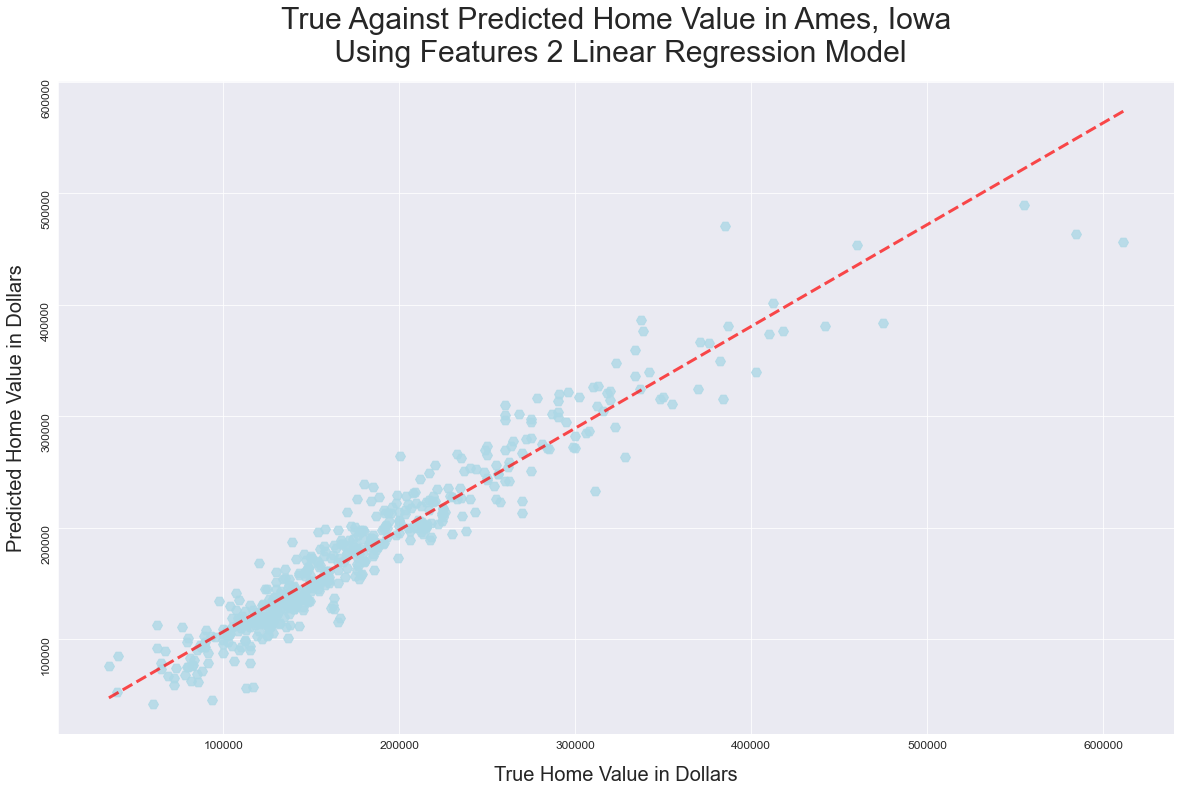

In [63]:
plt.figure(figsize = (20, 12))

plt.scatter(y_test, lr_pred, color ='lightblue', alpha = 0.8, marker = 'H',s=100)
plt.xlabel('True Home Value in Dollars', size = 20, labelpad = 15)
plt.ylabel('Predicted Home Value in Dollars', size = 20, labelpad = 15)
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 90)
plt.title('True Against Predicted Home Value in Ames, Iowa\n Using Features 2 Linear Regression Model', size = 30, pad = 20)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, lr_pred, 1))(np.unique(y_test)),'--',color = 'red', linewidth = 3, alpha=0.7);

plt.savefig('./visualizations/True_vs_Predicted_Home_Value_in_Ames_Iowa_Using_a_Linear_Regression_Model_features_2.png')

## Ridge Model for Features 2 <a name="ridge-feat2"></a>

#### Model Statistics

In [64]:

print("Ridge Model Trainning and Testing".center(100, "="))
print(f'R2 for Ridge Trainning: {ridge.score(X_train, y_train)}')
print(f'R2 for Ridge Testing: {ridge.score(X_test, y_test)}')

print('')
print("Ridge Model Prediction Statistics".center(100, "="))


print(f'R2 for this Ridge Prediction :{r2_score(y_test,ridge_pred)}')

print(f'MSE for this Ridge model is: {mean_squared_error(y_test, ridge_pred)}')
print(f'RMSE for this Ridge model is: {mean_squared_error(y_test, ridge_pred)**0.5}')

=================================Ridge Model Trainning and Testing==================================


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 21 is different from 92)

#### Model Visualization

In [ ]:
plt.figure(figsize = (20, 12))

plt.scatter(y_test, ridge_pred, color ='lightblue', alpha = 0.8, marker = 'H',s=100)
plt.xlabel('True Home Value in Dollars', size = 20, labelpad = 15)
plt.ylabel('Predicted Home Value in Dollars', size = 20, labelpad = 15)
plt.title('True Against Predicted Home Value in Ames, Iowa\n Using Features 2 Ridge Model', size = 30, pad = 20)
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 90)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, ridge_pred, 1))(np.unique(y_test)),'--',linewidth = 3, color = 'red',alpha=0.7);
plt.savefig('./visualizations/True_vs_Predicted_Home_Value_in_Ames_Iowa_Using_a_Ridge_Model_features_2.png')

## LASSO Model for Features 2<a name="lasso-feat2"></a>

In [ ]:
numerical_test = test._get_numeric_data()
test_copy = numerical_test.drop(columns=['Id','PID']).copy()
test_copy.fillna(0, inplace=True)
pipe_lasso_pred = pipe_lasso.predict(test_copy)

#### Model Statistics

In [ ]:
print("Pipeline LASSO Model Trainning and Testing".center(100, "="))
print(f'R2 for Pipeline LASSO Trainning : {pipe_lasso.score(X_train,y_train)}')
print(f'R2 for Pipeline LASSO Testing : {pipe_lasso.score(X_test,y_test)}')

print("LASSO Model Prediction Statistics".center(100, "="))

print(f'R2 for this LASSO Prediction: {r2_score(y_test, pipe_lasso.predict(X_test))}')

print(f'MSE for this LASSO model is: {mean_squared_error(y_test, pipe_lasso.predict(X_test))}')
print(f'RMSE for this LASSO model is: {mean_squared_error(y_test, pipe_lasso.predict(X_test))**0.5}')

In [ ]:
pd.DataFrame({
    'coefs': pipe_lasso.named_steps['pf'].get_feature_names(X_train.columns),
    'value': pipe_lasso.named_steps['lasso'].coef_
}).set_index('coefs').sort_values('value', ascending=False).head(10)

#### Model Visualization

In [ ]:
plt.figure(figsize = (20,12))

plt.scatter(y_test, pipe_lasso.predict(X_test), color ='lightblue', alpha = 0.8, marker = 'H', s=100)
plt.xlabel('True Home Value in Dollars', size = 20, labelpad = 15)
plt.ylabel('Predicted Home Value in Dollars', size = 20, labelpad = 15)
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 90)
plt.title('True Against Predicted Home Value in Ames, Iowa\n Using Features 2 Lasso Model', size = 30, pad = 20)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, pipe_lasso.predict(X_test), 1))(np.unique(y_test)),'--',color = 'red', linewidth = 3, alpha=0.7);

plt.savefig('./visualizations/True_vs_Predicted_Home_Value_in_Ames_Iowa_Using_a_Lasso_Model_features_2.png')

In [ ]:
pd.DataFrame({
     'Id': numerical_test['Id'],
     'SalePrice': pipe_lasso.predict(test_copy)
 }).to_csv('./submission.csv', index = False)

# Final Thoughts<a name="final"></a>

### Best Model Results 

#### Features 1

```
===========================Linear Regression Model Prediction Statistics============================
R2 for Linear Regression Prediction: 0.8700234972388585
MSE for this Linear Regression model is: 686366622.7770644
RMSE for this Linear Regression model is: 26198.59963389388

=================================LASSO Model Prediction Statistics==================================
Lasso Predicted R2:0.8706816416380891
MSE for this LASSO model is: 682891161.1435899
RMSE for this LASSO model is: 26132.186306231437

=================================Ridge Model Prediction Statistics==================================
R2 for this Ridge Prediction :0.8703364117573583
MSE for this Ridge model is: 684714215.7902782
RMSE for this Ridge model is: 26167.044460356585
```



#### Features 2

```
===========================Linear Regression Model Prediction Statistics============================
R2 for Linear Regression Prediction: 0.9206366157181036
MSE for this Linear Regression model is: 499113738.4875931
RMSE for this Linear Regression model is: 22340.85357562672

=================================LASSO Model Prediction Statistics==================================
R2 for this LASSO Prediction: 0.9308087194010227
MSE for this LASSO model is: 435141709.78186566
RMSE for this LASSO model is: 20860.050569973835

=================================Ridge Model Prediction Statistics==================================
R2 for this Ridge Prediction :0.9206067964317198
MSE for this Ridge model is: 499301271.0082985
RMSE for this Ridge model is: 22345.050257457435


```


Using a lasso regression along with a few data transformations, removal of extreme outliers, and the creation of dummy variables allowed me to fit a model that performed with an R2 value of  0.93.  The next steps are to attemp to predict the exact prices, I may want to try more advanced models or use classifying methods for variable selection.  